# Movie Correlation Project

The dataset used to perform this project is from: https://www.kaggle.com/danielgrijalvas/movies

This project involves:

    - Understanding the data 
    - Cleaning and filling (extrapolation) in missing data
    - Visualising the data using plotly and seaborn
    - Finding any correlations within the data
   
This project is split mainly into 2 parts:
    
- [Extrapolated data](#extrapolated_data)
- [Deleted data](#non_extrapolated_data)


Findings:
    
    - High correlation between gross earnings and budget (0.75 extrapolated, 0.74 non-extrapolated)
    - Correlation found between gross earnings and votes (0.63 extrapolated, 0.61 non-extrapolated)

In [396]:
df = pd.read_csv(r'C:\Users\Michael\Desktop\Python\Projects\Movie Industry\movies.csv')

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)# Adjusting the configuration of the plots that will be created


In [267]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


<a id='extrapolated_data'></a>

## Extrapolated data

In [293]:
df_extrapolated = df.copy()

In [294]:
# Dropping all rows that have more than 1 NaN values
# This is done as most have 1 NaN values missing and will be easier to 
#    extrapolate
df_extrapolated = df_extrapolated.dropna(thresh=14)

In [295]:
df_extrapolated

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000.0,461421559.0,Beijing Diqi Yinxiang Entertainment,149.0
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,NaN,3661.0,Prowess Pictures,98.0
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,NaN,413378.0,Pryor Entertainment,120.0
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000.0,NaN,Notis Studio,78.0


In [296]:
# Looking at the data for NaN values
# Only significant column with 1 NaN values to extrapolate is the budget
# All other columns that contain 1 NaN values are not needed as they are
#    immaterial
for col in df_extrapolated.columns:
    pct_missing = np.mean(df_extrapolated[col].isnull())
    print(f'{col} - {pct_missing}%')

name - 0.0%
rating - 0.001470981545867879%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.26624765980208615%
gross - 0.006953730944102701%
company - 0.0002674511901577962%
runtime - 0.0001337255950788981%


In [297]:
# Dropping per the findings above
df_extrapolated = df_extrapolated.dropna(subset=['rating',
                                                 'gross',
                                                 'company',
                                                 'runtime'])

In [298]:
# Interpolating the budget by setting the 'gross' column as an index
df_extrapolated = df_extrapolated.set_index('gross').interpolate(method='index').reset_index()

In [299]:
# Changing the datatype of 'budget' to int64
df_extrapolated.budget = df_extrapolated['budget'].astype('int64')

In [300]:
df_extrapolated

,gross,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,company,runtime
0,46998772.0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,Warner Bros.,146.0
1,58853106.0,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,Columbia Pictures,104.0
2,538375067.0,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,Lucasfilm,124.0
3,83453539.0,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,Paramount Pictures,88.0
4,39846344.0,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7407,111105497.0,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,20th Century Studios,100.0
7408,461421559.0,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,Beijing Diqi Yinxiang Entertainment,149.0
7409,3661.0,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,4342843,Prowess Pictures,98.0
7410,413378.0,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,14858328,Pryor Entertainment,120.0


In [301]:
# Rechecking to see if there are any other NaN values
for col in df_extrapolated.columns:
    pct_missing = np.mean(df_extrapolated[col].isnull())
    print(f'{col} - {pct_missing}%')

gross - 0.0%
name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
company - 0.0%
runtime - 0.0%


In [311]:
# Change datatype of the columns so that the votes, budget and gross does not have a trailing 0
#    e.g. 300030.0

df_extrapolated[['votes', 'gross']] = df_extrapolated[['votes', 'gross']].astype('int64')

In [399]:
# Takes in the 'released_year' column and returns the year
def extract_year(data):
    split = list(data.split())
    for col in split:
        try:
            int(col)
            return(col)
        except ValueError:
            pass

In [400]:
df_extrapolated['released_year'] = df_extrapolated.released.apply(extract_year)

In [402]:
# Check to see if there are any duplicates

# None found in this dataset
df_extrapolated.drop_duplicates()

,gross,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,company,runtime,released_year
0,46998772,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,Warner Bros.,146.0,1980
1,58853106,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,Columbia Pictures,104.0,1980
2,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,Lucasfilm,124.0,1980
3,83453539,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,Paramount Pictures,88.0,1980
4,39846344,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7407,111105497,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,20th Century Studios,100.0,2020
7408,461421559,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,Beijing Diqi Yinxiang Entertainment,149.0,2020
7409,3661,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400,Scott Teems,Scott Teems,Shea Whigham,United States,4342843,Prowess Pictures,98.0,2020
7410,413378,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294,Scott Pryor,Scott Pryor,Scott Pryor,United States,14858328,Pryor Entertainment,120.0,2020


<AxesSubplot:xlabel='budget', ylabel='gross'>

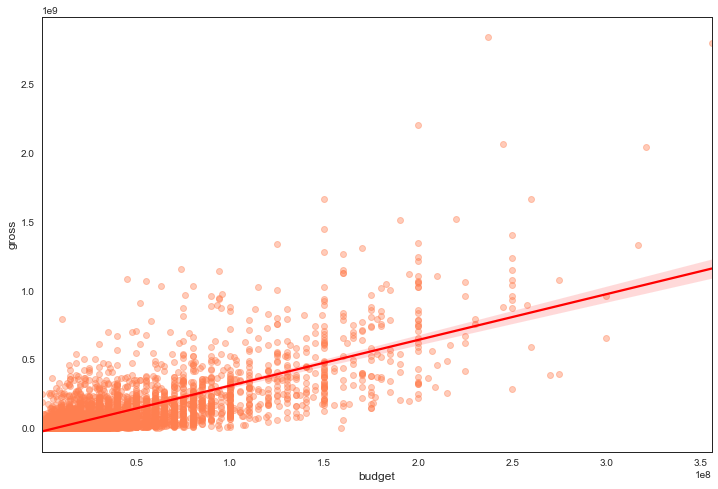

In [429]:
# Plot Budget vs. Gross using seaborn
sns.set_style("white")
sns.regplot(x='budget', 
            y='gross', 
            data=df_extrapolated, 
            scatter_kws={'color': 'coral', 'alpha': 0.4}, 
            line_kws={'color': 'red'},
           )

<function matplotlib.pyplot.show(close=None, block=None)>

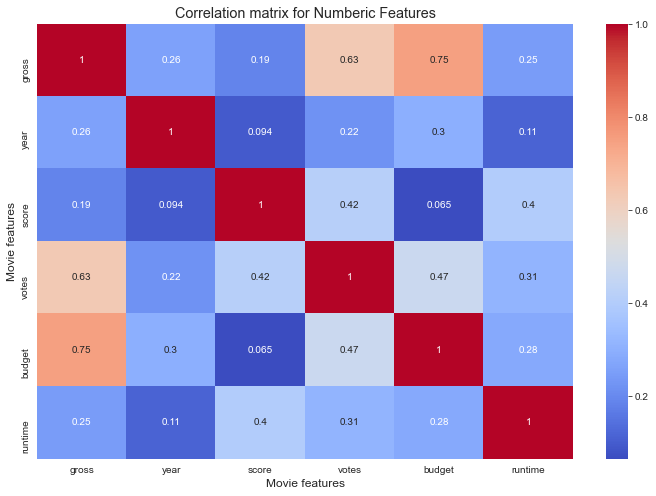

In [431]:
# High correlation between 'gross' and 'budget'

correlation_matrix = df_extrapolated.corr()


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


plt.title('Correlation matrix for Numberic Features')

plt.xlabel("Movie features")
plt.ylabel('Movie features')

plt.show

In [434]:
# Converting oject types into integers with assigned numbers (numeric representation)
# to look at the correlation between quantitative and qualitative data

df_numerised_extrapolated = df_extrapolated.copy()

for col in df_numerised_extrapolated.columns:
    if (df_numerised_extrapolated[col].dtype == 'object'):
        df_numerised_extrapolated[col] = df_numerised_extrapolated[col].astype('category')
        df_numerised_extrapolated[col] = df_numerised_extrapolated[col].cat.codes

df_numerised_extrapolated

,gross,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,company,runtime,released_year
0,46998772,6372,6,6,1980,1654,8.4,927000,2471,3851,979,52,19000000,2179,146.0,0
1,58853106,5373,6,1,1980,1445,5.8,65000,2169,1564,306,53,4500000,686,104.0,0
2,538375067,4956,4,0,1980,1718,8.7,1200000,1063,2464,1642,53,18000000,1446,124.0,0
3,83453539,277,4,4,1980,1445,7.7,221000,1248,1920,2112,53,3500000,1697,88.0,0
4,39846344,993,6,4,1980,1494,7.3,108000,1010,499,387,53,6000000,1665,98.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7407,111105497,5432,4,1,2020,978,6.8,42000,438,2838,895,6,135000000,17,100.0,40
7408,461421559,5586,3,0,2020,482,6.8,3700,1048,1602,2645,8,80000000,350,149.0,40
7409,3661,6265,6,5,2020,89,5.4,2400,2404,3726,2300,53,4342843,1786,98.0,40
7410,413378,6792,5,4,2020,1831,5.0,294,2399,3719,2241,53,14858328,1788,120.0,40


<function matplotlib.pyplot.show(close=None, block=None)>

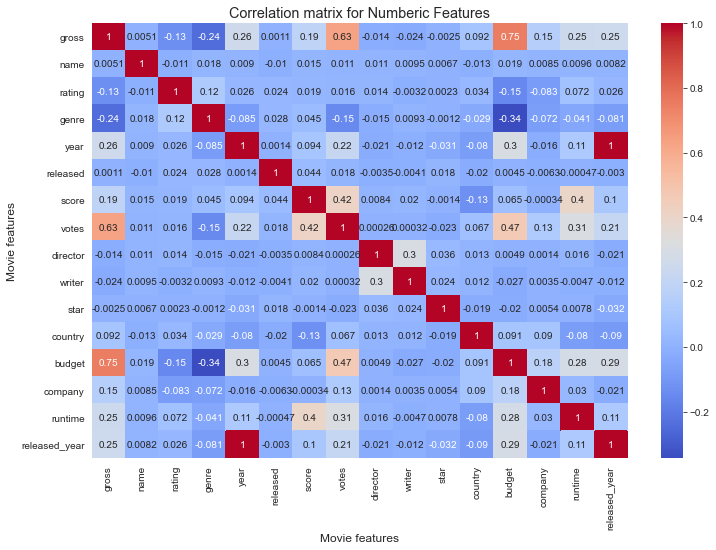

In [435]:
# High correlation between 'gross' and 'budget'

correlation_matrix = df_numerised_extrapolated.corr()


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


plt.title('Correlation matrix for Numberic Features')

plt.xlabel("Movie features")
plt.ylabel('Movie features')

plt.show

In [437]:
corr_pairs_extrapolated = df_numerised_extrapolated.corr().unstack().sort_values()

high_corr_extrapolated = corr_pairs_extrapolated[((corr_pairs) > 0.5) & (corr_pairs != 1)]
high_corr_extrapolated

gross          votes            0.631110
votes          gross            0.631110
budget         gross            0.749889
gross          budget           0.749889
year           released_year    0.997548
released_year  year             0.997548
dtype: float64

<a id='non_extrapolated_data'></a>
## Non-extrapolated data

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [363]:
# Dropping all rows that contain any NaN values
df_nonext = df.dropna().copy()

In [397]:
# Check to see if any NaN values remain
for col in df_nonext.columns:
    pct_missing = np.mean(df_nonext[col].isnull())
    print(f'{col} - {pct_missing}%')

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%
released_year - 0.0%


In [365]:
# Change datatype of the columns so that the votes, budget and gross does not have a trailing 0
#    e.g. 300030.0

df_nonext[['budget', 'gross','votes']] = df_nonext[['budget', 'gross','votes']].astype('int64')

In [366]:
# Check to see the data types
df_nonext.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [367]:
# Takes in the 'released_year' column and returns the year
def extract_year(data):
    split = list(data.split())
    for col in split:
        try:
            int(col)
            return(col)
        except ValueError:
            pass

In [368]:
df_nonext['released_year'] = df_nonext.released.apply(extract_year)

In [369]:
df_nonext

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


In [370]:
df_nonext.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


In [325]:
# If you want to set to show all the values for each time run
# pd.set_option('display.max_row', None)

In [372]:
# Check to see if there are any duplicates

# None found in this dataset
df_nonext.drop_duplicates()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


In [330]:
# Testing Hypothesis

# H0 - budget to have high correlation to gross
#    - company and high correlation

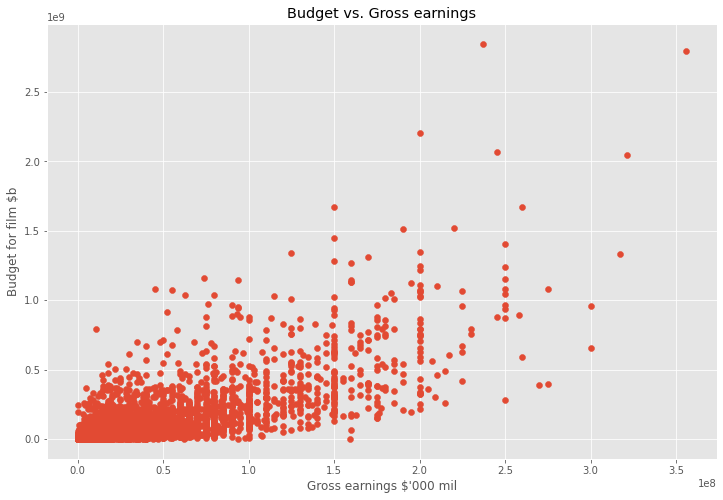

In [373]:
# Build a scatter plot

# Budget vs. Gross revenue

plt.scatter(x=df_nonext['budget'], y=df_nonext['gross'])

plt.title('Budget vs. Gross earnings')
plt.xlabel("Gross earnings $'000 mil")
plt.ylabel('Budget for film $b')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

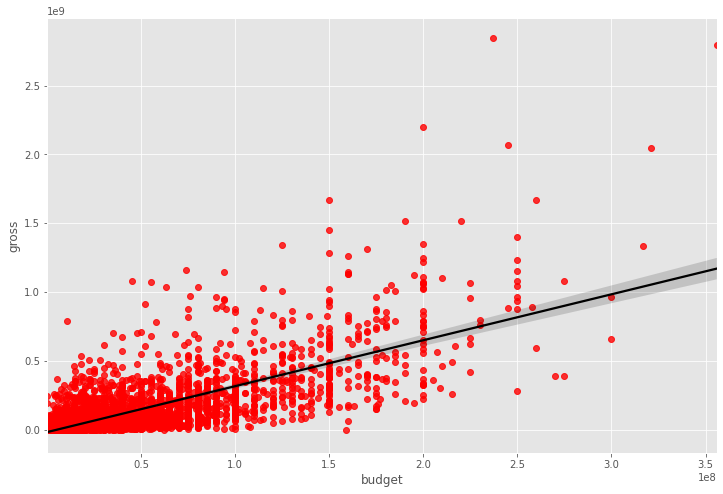

In [342]:
# Plot Budget vs. Gross using seaborn

sns.regplot(x='budget', y='gross', data=df_nonext, scatter_kws={'color': 'red'}, line_kws={'color': 'black'})

In [374]:
# Correlation

df_nonext.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

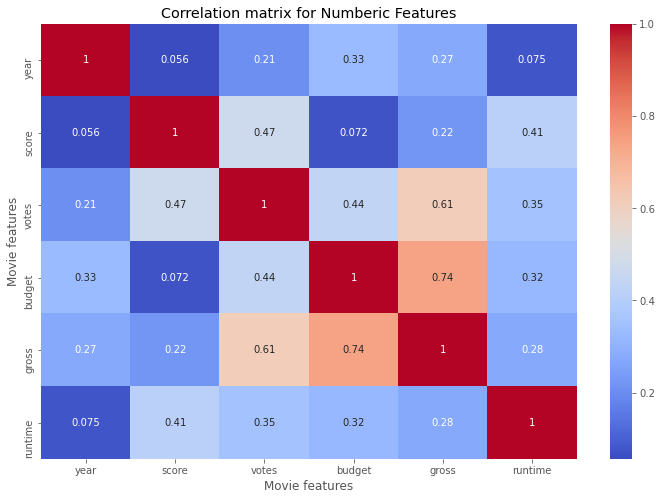

In [375]:
# High correlation between 'gross' and 'budget'

correlation_matrix = df_nonext.corr()


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


plt.title('Correlation matrix for Numberic Features')

plt.xlabel("Movie features")
plt.ylabel('Movie features')

plt.show

In [440]:
# Converting oject types into integers with assigned numbers (numeric representation)
# to look at the correlation between quantitative and qualitative data

df_numerised = df_nonext.copy()

for col in df_numerised.columns:
    if (df_numerised[col].dtype == 'object'):
        df_numerised[col] = df_numerised[col].astype('category')
        df_numerised[col] = df_numerised[col].cat.codes

df_numerised


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0,0
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0,0
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0,0
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0,0
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,904,6.6,140000,16,2390,1812,47,90000000,426505244,452,124.0,40
7649,3556,4,0,2020,713,6.5,102000,852,2309,147,47,85000000,319715683,1108,99.0,40
7650,1153,4,1,2020,904,5.6,53000,1809,2827,1470,47,175000000,245487753,1397,101.0,40
7651,3978,4,1,2020,758,6.8,42000,294,2091,640,6,135000000,111105497,12,100.0,40


In [377]:
df_nonext

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


<function matplotlib.pyplot.show(close=None, block=None)>

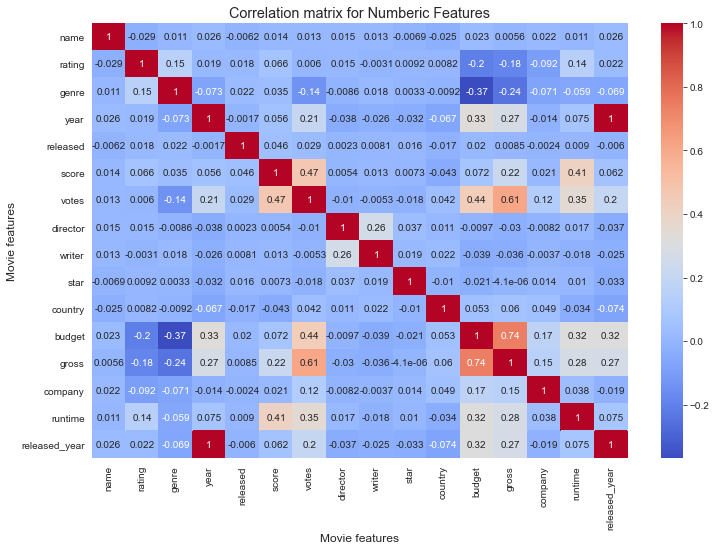

In [441]:
# High correlation between 'gross' and 'budget'

correlation_matrix = df_numerised.corr()


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


plt.title('Correlation matrix for Numberic Features')

plt.xlabel("Movie features")
plt.ylabel('Movie features')

plt.show

In [442]:
df_numerised.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.025542
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.022021
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.069147
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.998726
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,-0.005989
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.061923
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.203098
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.037371
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.025495
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.032687


In [443]:
corr_pairs = df_numerised.corr().unstack().sort_values()

high_corr = corr_pairs[((corr_pairs) > 0.5) & (corr_pairs != 1)]
high_corr

gross          votes            0.614751
votes          gross            0.614751
gross          budget           0.740247
budget         gross            0.740247
year           released_year    0.998726
released_year  year             0.998726
dtype: float64

<a id="extrapolation_vs_non"></a>
## Extrapolation vs. Non-extrapolation

In [458]:
corr_pairs['gross']

genre           -0.244101
rating          -0.181906
writer          -0.035885
director        -0.029560
star            -0.000004
name             0.005639
released         0.008501
country          0.060078
company          0.149553
score            0.222556
released_year    0.268721
year             0.274321
runtime          0.275796
votes            0.614751
budget           0.740247
gross            1.000000
dtype: float64

In [459]:
corr_pairs_extrapolated['gross']

genre           -0.242597
rating          -0.131786
writer          -0.024021
director        -0.014296
star            -0.002451
released         0.001084
name             0.005135
country          0.091951
company          0.153980
score            0.188071
runtime          0.245117
released_year    0.251873
year             0.258826
votes            0.631110
budget           0.749889
gross            1.000000
dtype: float64

In [457]:
# Comparing the extrapolated data against non-extrapolated data
# Extrapolated data contain roughly 2,000 more rows totalling ~ 7,000 rows

# Per below, extrapolation resulted in stronger correlation between gross earnings and country, ratings.

corr_pairs_extrapolated['gross'] - corr_pairs['gross']

budget           0.009642
company          0.004427
country          0.031873
director         0.015264
genre            0.001504
gross            0.000000
name            -0.000504
rating           0.050120
released        -0.007417
released_year   -0.016848
runtime         -0.030679
score           -0.034485
star            -0.002446
votes            0.016359
writer           0.011865
year            -0.015495
dtype: float64